In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
INPUT = 'realistic'
# INPUT = 'toy'
if INPUT == 'toy':
    quality_cancel_func = lambda i, j: np.mean(i.sum(axis=1)) - np.mean(j.sum(axis=1))
elif INPUT == 'realistic':
    quality_cancel_func = lambda i, j: np.mean(i) - np.mean(j)

In [3]:
with open('../results/vary_plasticity_th_%s_input.pkl' % INPUT, 'rb') as f:
    df_th = pickle.load(f)
df_th = pd.DataFrame(df_th)

In [31]:
with open('../results/vary_HVC_sparsity_%s_input.pkl' % INPUT, 'rb') as f:
    df_cW = pickle.load(f)
df_cW = pd.DataFrame(df_cW)
df_cW.loc[:,'cW'] *= 100

In [32]:
aux = zip(df_th['TS_similarity_pre'], df_th['TS_similarity_post'])
df_th['quality_cancel'] = [quality_cancel_func(i, j) for i,j in aux]

In [33]:
aux = zip(df_cW['TS_similarity_pre'], df_cW['TS_similarity_post'])
df_cW['quality_cancel'] = [quality_cancel_func(i, j) for i,j in aux]

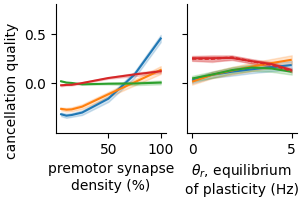

In [39]:
fig, ax = plt.subplots(1, 2, sharey='all', figsize=(3, 2))
hue_order = ['FF', 'HVC2E', 'E2E', 'E2I2E']
sns.lineplot(data=df_cW, x='cW', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax[0])
labels = ('Feedforward', 'EI net (premotor$\\to$E)', 'EI net (E$\\to$E)', r'EI net (E$\to$I$\to$E)')
ax[0].set(ylabel='cancellation quality'+' '*10, xlabel='premotor synapse\ndensity (%)', 
          yticks=[0, 0.5], ylim=[-0.5, 0.8])

hue_order = ['FF', 'HVC2E', 'E2E', 'E2I2E_thI5', 'E2I2E_thI10']
sns.lineplot(data=df_th, x='th', y='quality_cancel', 
             hue='model', hue_order=hue_order, palette=['C%d' % i for i in range(4)]+['C3'], 
             style='model', style_order=hue_order, dashes=[(1,0)]*4+[(2,1)], 
             legend=False, ax=ax[1])
labels = ('Feedforward', 'EI net (premotor$\\to$E)', 'EI net (E$\\to$E)', r'EI net (E$\to$I$\to$E)')
ax[1].set(xlabel='$\\theta_r$, equilibrium\nof plasticity (Hz)')
fig.savefig('../svg/quality_cancel_%s_input.svg' % INPUT)

[Text(0, 0.5, 'cancellation quality          '),
 Text(0.5, 0, 'premotor\nsynapse density'),
 (-0.5, 0.8)]

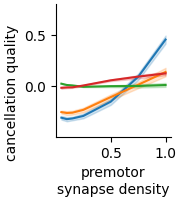

In [21]:
fig, ax = plt.subplots(1, sharey='all', figsize=(1.8, 2))
hue_order = ['FF', 'HVC2E', 'E2E', 'E2I2E']
sns.lineplot(data=df_cW, x='cW', y='quality_cancel', 
             hue='model', hue_order=hue_order, legend=False, ax=ax)
labels = ('Feedforward', 'EI net (premotor$\\to$E)', 'EI net (E$\\to$E)', r'EI net (E$\to$I$\to$E)')
ax.set(ylabel='cancellation quality'+' '*10, xlabel='premotor\nsynapse density', 
       yticks=[0, 0.5], ylim=[-0.5, 0.8])
# fig.savefig('../svg/quality_cancel_premotor_sparsity_%s_input.svg' % INPUT)

[Text(0, 0.5, 'cancellation quality          '),
 Text(0.5, 0, '$\\theta_r$, equilibrium\nof plasticity (Hz)'),

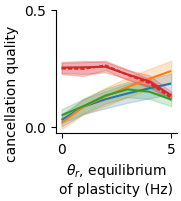

In [22]:
fig, ax = plt.subplots(1, sharey='all', figsize=(1.8, 2))
hue_order = ['FF', 'HVC2E', 'E2E', 'E2I2E_thI5', 'E2I2E_thI10']
sns.lineplot(data=df_th, x='th', y='quality_cancel', 
             hue='model', hue_order=hue_order, palette=['C%d' % i for i in range(4)]+['C3'], 
             style='model', style_order=hue_order, dashes=[(1,0)]*4+[(2,1)], 
             legend=False, ax=ax)
labels = ('Feedforward', 'EI net (premotor$\\to$E)', 'EI net (E$\\to$E)', r'EI net (E$\to$I$\to$E)')
ax.set(ylabel='cancellation quality'+' '*10, xlabel='$\\theta_r$, equilibrium\nof plasticity (Hz)', 
       yticks=[0, 0.5])
# fig.savefig('../svg/quality_cancel_premotor_sparsity_%s_input.svg' % INPUT)

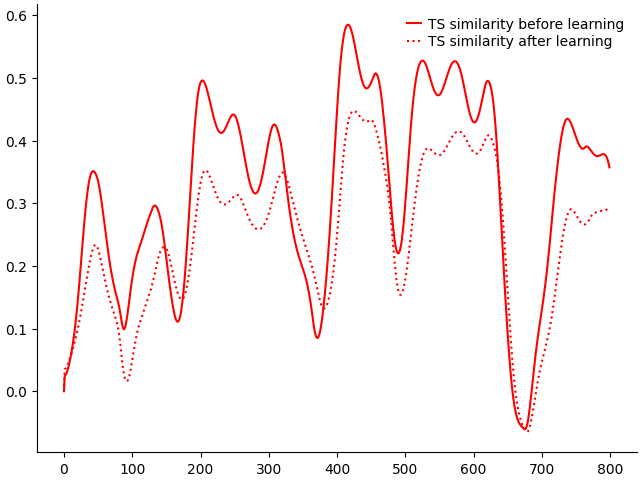

In [9]:
m, th, i = 'EIrec', 0, 2
plt.plot(df_th[(df_th.model==m)&(df_th.th==th)].iloc[i,2], c='r', 
         label='TS similarity before learning')
plt.plot(df_th[(df_th.model==m)&(df_th.th==th)].iloc[i,3], c='r', ls=':', 
         label='TS similarity after learning')
plt.legend()

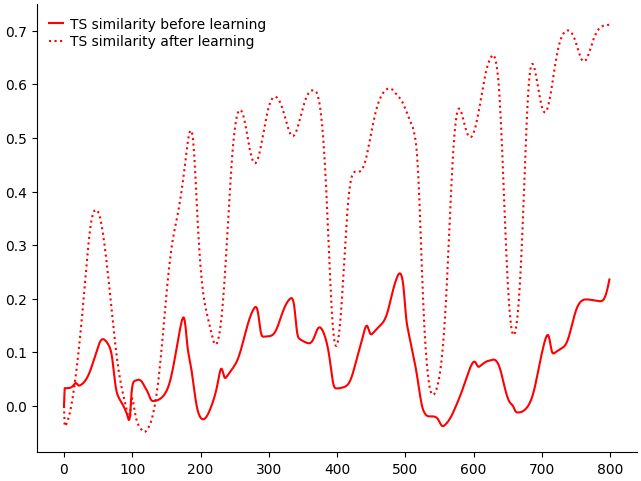

In [10]:
m, cW, i = 'FF', 0.05, 0
plt.plot(df_cW[(df_cW.model==m)&(df_cW.cW==cW)].iloc[i,2], c='r', 
         label='TS similarity before learning')
plt.plot(df_cW[(df_cW.model==m)&(df_cW.cW==cW)].iloc[i,3], c='r', ls=':', 
         label='TS similarity after learning')
plt.legend()